# Homework 3 - Robust Estimates
## Data Analysis
### FINM August Review 

Mark Hendricks

hendricks@uchicago.edu

TA: Maneet Singh

# 1 Robust Estimators

Again, use the data in `../data/spy_rates_data.xlsx`

- Return data on various asset classes.
- This data comes via ETFs, which we will discuss in the Markets series.
- Use the multivariate regression model in Homework 2 of SPY on the dividend-price ratio and treasury rate.


## 1.1 Serial Correlation and Durbin Watson Test

Residuals are the difference between the observed values $r_t^{\text{SPY}}$ and predicted values $\hat{r_t}^{\text{SPY}}$

$$r_t^{\text{SPY}} = \alpha + \boldsymbol{\beta}\boldsymbol{r}_t + \epsilon_t$$

$$\hat{r_t}^{\text{SPY}} = \alpha + \boldsymbol{\beta}\boldsymbol{r}_t$$

$$ \implies \epsilon_t = r_t^{\text{SPY}} - \hat{r_t}^{\text{SPY}}$$


**1. Calculate the residuals from the multivariate regression model. Also compute the first lag of the residuals. Plot the residuals and the first lag of residuals using a scatterplot. Calculate the correlation between the two. Interpret the results**


**2. Compute and Display the ACF plot for the residuals.**

*Serial correlation (also called autocorrelation) is where an error at one point in time travels to a subsequent point in time. An ACF Plot or Autocorrelation plot is a visual way to show serial correlation in data that changes over time. In the previous question we checked the serial correlation at lag 1, but an ACF plot helps us visually inspect serial correlation at multiple lags.*


**3. Calculate the Durbin-Watson statistic and p-value for the model residuals. What do you see?**


## 1.2 Heteroskedasticity and White's Test


Using the residuals calculated in the previous question, achieve the following:

**1. Create a scatterplot of the model residuals against the fitted values and the model regressors. Do you see any patterns. What can you conclude?**


**2. Calculate White's test for heteroskedasticity. Display the test statistic and the p-value. State the null and the alternative hypothesis for this test. Interpret your results. What can you conclude?**


## 1.3 Robust Standard Errors

**1. Calculate robust standard errors. These are known as HAC estimators, with perhaps the most well-known being the Newey-West estimators. They correct for any heteroskedasticity and serial correlation, returning modified t-stats. (The estimates of alpha and betas should be the same as classic OLS.)**

**2. Compare the HAC-consistent p-values to the one observed in standard case and comment if the regressors are still statistically significant** 

# Solution

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import os
os.chdir('/Users/maneetsingh/Documents/University of Chicago/TA - Aug Review/finm-data-analysis-2022')

SPYFILE = 'data/spy_rate_data.xlsx'
data = pd.read_excel(SPYFILE).rename(columns={'Unnamed: 0':'date'}).set_index('date')

X,y = sm.add_constant(data[["10-yr Yields", "Dvd-Price Ratio"]]), data["SPY US Equity"]
mod = sm.OLS(y, X).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:          SPY US Equity   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     4.465
Date:                Sat, 20 Aug 2022   Prob (F-statistic):             0.0125
Time:                        12:05:29   Log-Likelihood:                 423.48
No. Observations:                 239   AIC:                            -841.0
Df Residuals:                     236   BIC:                            -830.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0741      0.023     

## 1.1 Serial Correlation and Durbin Watson Test

### 1.

,Residual Summary
count,239.0000
mean,0.0000
std,0.0412
min,-0.1442
25%,-0.0229
50%,0.0031
75%,0.0256
max,0.1075


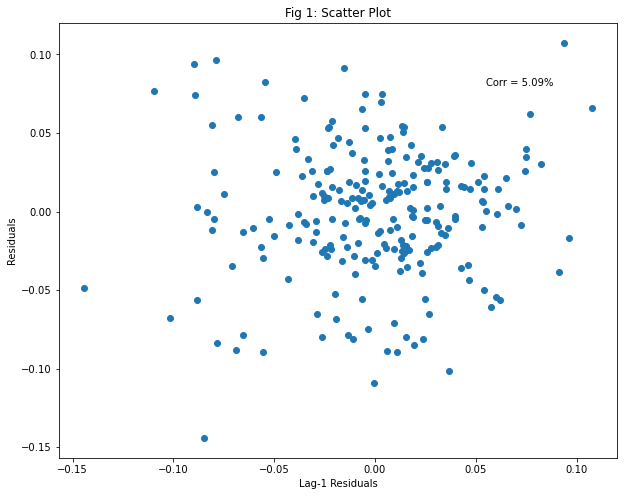

In [2]:
# Residuals
residuals = mod.resid
display(pd.DataFrame(residuals.describe(), columns = ['Residual Summary']))

# First Lag Residuals
lag_residuals = residuals.shift()

#inspect autocorrelation at first lag
plt.figure(figsize=(10,8))
plt.scatter(lag_residuals, residuals)
plt.xlabel('Lag-1 Residuals')
plt.ylabel('Residuals')
plt.title('Fig 1: Scatter Plot')

# Correlation Calculation
plt.annotate('Corr = {:,.2%}'.format(residuals.corr(lag_residuals)), (0.055, 0.08))
plt.show()

We checked the lag-1 autocorrelation, which indicates there is no significant serial correlation in the sample residuals. While that does not guarantee whether there is serial correlation in the population residuals, we take it as evidence that it is not a big concern. To test for higher order lags, we use an ACF plot. Further, Durbin Watson test is a statistical test for serial correaltion. 

### 2.

In [3]:
from statsmodels.graphics.tsaplots import plot_acf

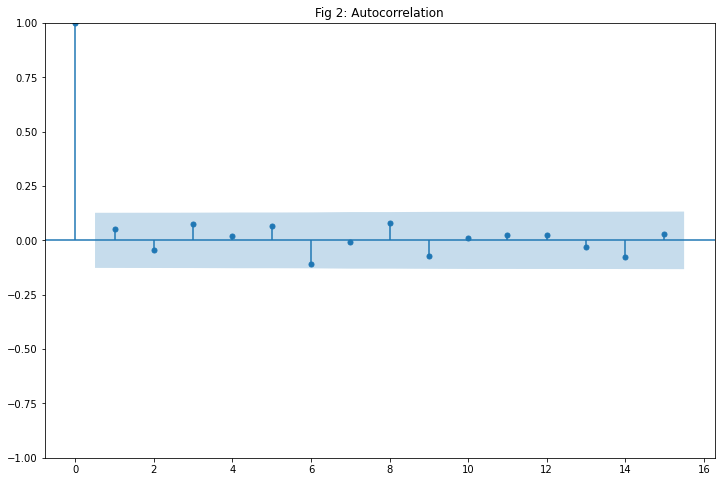

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
plot_acf(residuals, lags = 15, ax = ax, title = 'Fig 2: Autocorrelation')
plt.show()

From the ACF plot, we can see that significant evidence of serial correaltion is not observed upto 15 lags.

### 3

In [5]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
dw_stats = durbin_watson(residuals)

print('Durbin Watson Test Statistic: {:,.2f}'.format(dw_stats))

Durbin Watson Test Statistic: 1.89


The DW statistic ranges from zero to four, with a value of 2.0 indicating zero autocorrelation. Values below 2.0 mean there is positive autocorrelation and above 2.0 indicates negative autocorrelation. In this case, since the value is close to 2, we can say that autocorrealtion is not observed.

## 1.2 Heteroskedasticity and White's Test

### 1.

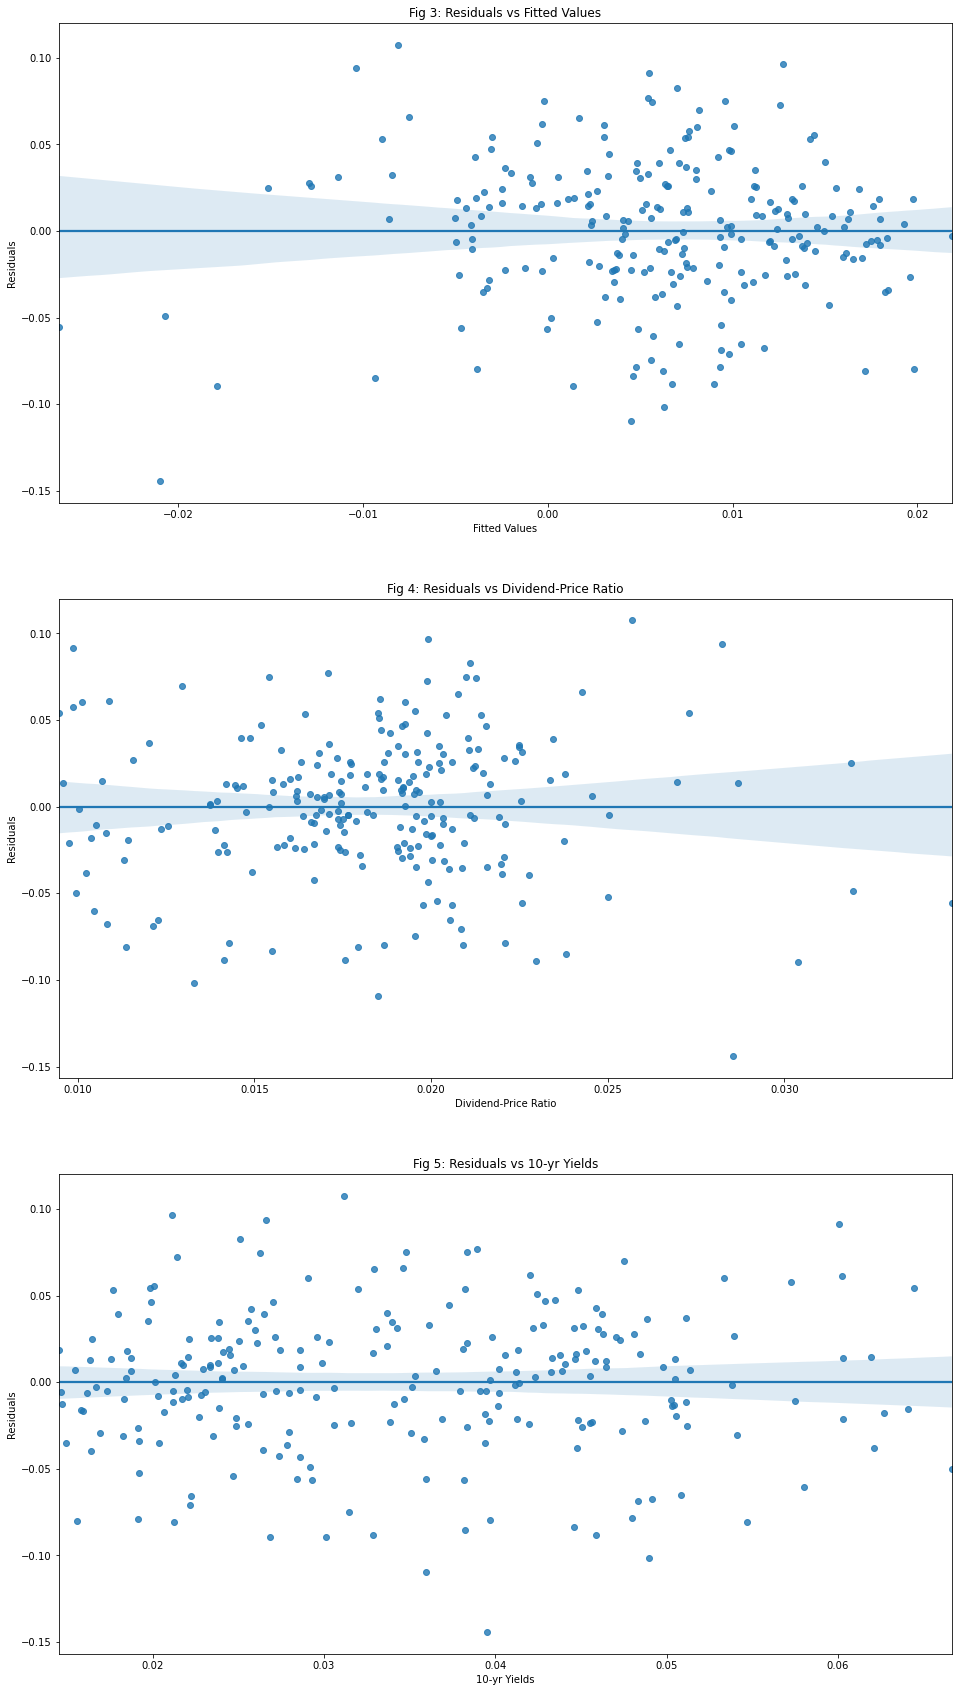

In [6]:
# X-Axis Variables
fitted_vals = mod.predict()
div_pr_ratio = data['Dvd-Price Ratio']
T_yield = data['10-yr Yields']

fig, ax = plt.subplots(3,1, figsize = (16,30))

sns.regplot(x = fitted_vals, y = residuals, ax = ax[0])
ax[0].set_ylabel('Residuals')
ax[0].set_xlabel('Fitted Values')
ax[0].set_title('Fig 3: Residuals vs Fitted Values')

sns.regplot(x = div_pr_ratio, y = residuals, ax = ax[1])
ax[1].set_ylabel('Residuals')
ax[1].set_xlabel('Dividend-Price Ratio')
ax[1].set_title('Fig 4: Residuals vs Dividend-Price Ratio')

sns.regplot(x = T_yield, y = residuals, ax = ax[2])
ax[2].set_ylabel('Residuals')
ax[2].set_xlabel('10-yr Yields')
ax[2].set_title('Fig 5: Residuals vs 10-yr Yields')

plt.show()

To visually inspect heteroscedasticity first, we use a scatter plot between fitted values of the model and the residuals of the model. If heteroscedasticity exists, you will see a cone-shaped pattern in the scatterplot (Variance in residuals will be more on one side i.e. the points will be further away from one another and variance will be less on the other side i.e. the points will be closer to one another.

In this case, we see a slight cone-shaped pattern where the variance in residuals is higher when the fitted values are small and the variance in residuals is lower when the fitted values are large. This indicates heteroscedasticity in the sample.

To further inspect which regressor is causing heteroscedasticity, we look at scatterplots between regressors and residuals. In our case, we see that Dividend-Price ratio shows a similar cone-shaped pattern with the residuals. 10-yr Yields does not have a significant pattern. This is evidence that heteroscedasticity is caused by Dividend-Price ratio which needs to be accounted for in the standard errors. 

### 2.

White Test Hypothesis Statement:

$H_0:$ Residual Variances are Constant

$H_A:$ Residual Variances are not Constant

In [7]:
from statsmodels.stats.diagnostic import het_white
X = mod.model.exog
lm, pval, _, _ = het_white(residuals,X)
print(f'White-test for Heteroskedasticity statistic is {lm:.4f}')
print(f'White-test for Heteroskedasticity p-value is {pval:.4%}')

White-test for Heteroskedasticity statistic is 23.0772
White-test for Heteroskedasticity p-value is 0.0326%


Since p-value < 5%, we can confidently reject the null hypothesis and accept that the residual variances are not constant (heteroscedasticity). So we conclude that heteroscedasticity exists in our model

## 1.3 Robust Standard Errors

### 1.

*To estimate HAC consistent standard errors, we specify the cov-type argument. Read more about the different types of covariance estimations here: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.get_robustcov_results.html#statsmodels.regression.linear_model.RegressionResults.get_robustcov_results*

In [8]:
X = sm.add_constant(data[["10-yr Yields", "Dvd-Price Ratio"]])
y = data["SPY US Equity"]
model_robust = sm.OLS(y, X).fit(cov_type = 'HC0')
model_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SPY US Equity   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.183
Date:                Sat, 20 Aug 2022   Prob (F-statistic):             0.0433
Time:                        12:05:30   Log-Likelihood:                 423.48
No. Observations:                 239   AIC:                            -841.0
Df Residuals:                     236   BIC:                            -830.5
Df Model:                           2                                         
Covariance Type:                  HC0                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0741      0.030      2.461      0.014       0.015       0.133
10-yr Yields       -0.7707      0.305     -2.523      0.012      -1.370      -0.172
Dvd-Price Ratio    -2.2646      1.202     -1.885      0.059      -4.620       0.090
==============================================================================
Omnibus:                        6.566   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.427
Skew:                          -0.333   Prob(JB):                       0.0402
Kurtosis:                       3.448   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [9]:
pvals = pd.DataFrame([model_robust.pvalues, mod.pvalues], \
                     index = ['Robust Model P-Values', 'Standard Model P-Values'])
display(pvals.transpose().style.format('{:,.4%}'))

,Robust Model P-Values,Standard Model P-Values
const,1.3866%,0.1608%
10-yr Yields,1.1640%,0.6344%
Dvd-Price Ratio,5.9470%,0.8145%


From the table above, we can see that the p-value for Dividend-Price Ratio increased significantly when we consider the HAC consistent standard errors. Infact, under the robust model p-value for Dividend Price Ratio > 5% which means that we cannot conclude it to be statistically significant at 95% confidence level.